# Human Face-Detection using open cv

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
face_cascade=cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml") #Note the change

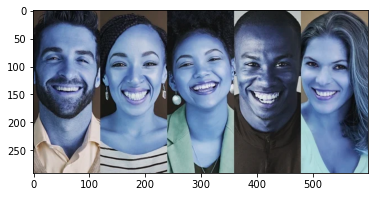

In [2]:
imaging = cv.imread("F.png")
plt.imshow(imaging)

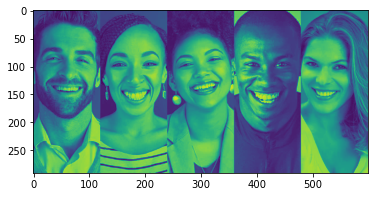

In [3]:
# Altering properties of image with cv2  
img_gray = cv.cvtColor(imaging, cv.COLOR_BGR2GRAY) 
plt.imshow(img_gray)

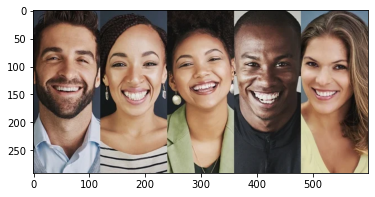

In [4]:
imaging_rgb = cv.cvtColor(imaging, cv.COLOR_BGR2RGB)  
plt.imshow(imaging_rgb)

In [ ]:
faces=face_cascade.detectMultiScale(imaging_rgb, scaleFactor=1.05,minNeighbors=5)

for x, y, w, h in faces:
    img=cv.rectangle(imaging_rgb,(x,y),(x+w,y+h),(0,255,0),3)

resized=cv.resize(imaging_rgb,(int(imaging_rgb.shape[1]/1), int(imaging_rgb.shape[0]/1))) 

cv.imshow("Deteced-face",resized)
cv.waitKey(0)
cv.destroyAllWindows()

# OpenCV-- open-source library for the computer vision
OpenCV is the huge open-source library for the computer vision, machine learning, and image processing and now it plays a major role in real-time operation which is very important in today’s systems. By using it, one can process images and videos to identify objects, faces, or even handwriting of a human. When it integrated with various libraries, such as NumPy, python is capable of processing the OpenCV array structure for analysis. To Identify image pattern and its various features we use vector space and perform mathematical operations on these features.
## Applications of OpenCV: 
There are lots of applications which are solved using OpenCV, some of them are listed below 
- face recognition
- Automated inspection and surveillance
- number of people – count (foot traffic in a mall, etc)
- Vehicle counting on highways along with their speeds
- Interactive art installations
- Anamoly (defect) detection in the manufacturing process (the odd defective products)
- Street view image stitching
- Video/image search and retrieval
- Robot and driver-less car navigation and control
- object recognition
- Medical image analysis
- Movies – 3D structure from motion
- TV Channels advertisement recognition
## OpenCV Functionality 
- Image/video I/O, processing, display (core, imgproc, highgui)
- Object/feature detection (objdetect, features2d, nonfree)
- Geometry-based monocular or stereo computer vision (calib3d, stitching, videostab)
- Computational photography (photo, video, superres)
- Machine learning & clustering (ml, flann)
- CUDA acceleration (gpu)

## Installation
Mac/Windows
To make it easy type in the following command in terminal.<br>
`$ pip install opencv-python`

## Reading the Image

In [ ]:
#loading required libraries
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread("apple.jpeg")   # Read the image
plt.imshow(img)   # Ploting the image using matplotlib

Notice how the apple looks weird?
This is because OpenCV utilize the BGR format

## `cv2.imread()`
method loads an image from the specified file. If the image cannot be read (because of missing file, improper permissions, unsupported or invalid format) then this method returns an empty matrix.
<br>
Parameters:
- path: A string representing the path of the image to be read.
- flag: It specifies the way in which image should be read. It’s default value is cv2.IMREAD_COLOR

- Return Value: This method returns an image that is loaded from the specified file.

### All three types of flags are described below:
- cv2.IMREAD_COLOR: It specifies to load a color image. Any transparency of image will be neglected. It is the default flag. Alternatively, we can pass integer value 1 for this flag.
- cv2.IMREAD_GRAYSCALE: It specifies to load an image in grayscale mode. Alternatively, we can pass integer value 0 for this flag.
- cv2.IMREAD_UNCHANGED: It specifies to load an image as such including alpha channel. Alternatively, we can pass integer value  -1 for this flag.

In [ ]:
img = cv.imread("apple.jpeg",-1)   # Read the image
plt.imshow(img) 

we are going to Convert it to RGB format using the `cvtColor()` function in OpenCV, using the `cv.COLOR_BGR2RGB` as the parameter.

In [ ]:
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [ ]:
#Examine The Image
print("Image type: ", type(img_rgb))
print("Image data type: ", img_rgb.dtype)
print("Image shape: ", img_rgb.shape)

In [ ]:
np.array(img_rgb)

In [ ]:
# Drawing Shapes
#lines
line_img = img_rgb.copy()        # Make a copy of the image
cv.line(line_img,(0,50),(200,200),(0,0,255),5)   # Draw the line
#     start pos,  end pos , color of our line , thickness
plt.imshow(line_img)    # show the image

In [ ]:
#rectangle
rectangle_img = img_rgb.copy()
cv.rectangle(rectangle_img,(25,50),(175,150),(0,0,255),3)
#(25,50), pt1, vertex of the rectangle
#(175,150), pt2, vertext of the rectangle of the pt1
plt.imshow(rectangle_img)

In [ ]:
#circle
circle_img = img_rgb.copy() 
cv.circle(circle_img,(100,130), 90, (0,0,255), -1)
#(100,130), center location of where the circle starts
#90, the radius of the circle in pixels
#(0,0,255), the RGB value of our rectangle color, in this case it is blue
#-1 thickness of our circle, if NEGATIVE, then the circle is going to be filled
plt.imshow(circle_img)

In [ ]:
#ellipse
ellipse_img = img_rgb.copy()    
cv.ellipse(ellipse_img,(100,100),(100,50),0,0,270,(0,0,255),3)
#(100,100), center of our Ellipse
#(100,50), axes lengths (major axis length, minor axis length)
#0,0,180 , represents the ellipse rotation angle 0 , start angle 0, and end angel 180
#-1 meant that the ellipse will be filled instead of displaying a silhouette with x amount of pixels
plt.imshow(ellipse_img) 

In [ ]:
#polygon
polygon_img = img_rgb.copy()
pts = np.array([[70,85],[100,150],[160,150],[120,90]], np.int32)      
pts = pts.reshape((-1,1,2))    
                                       
cv.polylines(polygon_img,[pts],True,(0,0,255),3)
plt.imshow(polygon_img)
plt.grid()

In [ ]:
#Putting Text on Image
text_img = img_rgb.copy()                
font = cv.FONT_HERSHEY_SIMPLEX 
textcolor = (255,0,255)
cv.putText(text_img,'Apple',(20,130),font, 2,textcolor,3,cv.LINE_AA)             
plt.imshow(text_img) 

In [ ]:
#saving theimage
cv.imwrite("Apple_with_Text.jpg",text_img)

In [ ]:
#edge detection
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('apple.jpeg',0)
edges = cv.Canny(img,100,100)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()